In [2]:
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.read_csv("week_purchases18-25.txt", delimiter='\t')

In [3]:
print(df)

         Username TitleCli         Name                         Address  \
0    user_1000884    MRS    DORIS126855  89594388-Boris Road-Doris Town   
1    user_1009862    MRS     DORIS42531  75844730-Boris Road-Doris Town   
2    user_1025298   MISS    DORIS136770  39704306-Boris Road-Doris Town   
3    user_1039001      MR   BORIS111529  46627181-Boris Road-Doris Town   
4    user_1040891    MRS    DORIS142154  82645107-Boris Road-Doris Town   
..            ...      ...          ...                             ...   
734   user_972607     MRS     DORIS6273  36217755-Boris Road-Doris Town   
735   user_975665     MR     BORIS95778  43605144-Boris Road-Doris Town   
736   user_979177    MRS     DORIS74765  94620905-Boris Road-Doris Town   
737    user_99281      MR    BORIS13620  57719599-Boris Road-Doris Town   
738   user_993341      MR   BORIS137380  29294945-Boris Road-Doris Town   

    Country Gender   Age Favourites           Order_ID  Product_ID      Style  \
0       USA      F

In [4]:
print('Tamanho do df: '+str(df.size))
print(df.describe())
print()
print(df.dtypes)


Tamanho do df: 11824
              Age   Product_ID       Price
count  444.000000   739.000000  739.000000
mean    43.182432  1039.170501    8.742368
std     14.657891    17.813339    2.879627
min     21.000000  1001.000000    5.990000
25%     32.000000  1024.000000    5.990000
50%     37.000000  1042.000000    7.990000
75%     58.000000  1056.000000    9.990000
max     75.000000  1062.000000   15.990000

Username       object
TitleCli       object
Name           object
Address        object
Country        object
Gender         object
Age           float64
Favourites     object
Order_ID       object
Product_ID      int64
Style          object
Film_Title     object
Price         float64
PurchTime      object
PurchDate      object
Buy_for        object
dtype: object


In [5]:
missing_rows = df.isnull().any(axis=1)
# dframe_missing_rows = df[missing_rows]
# print(dframe_missing_rows)
print(missing_rows)

0      False
1      False
2      False
3       True
4      False
       ...  
734     True
735    False
736    False
737     True
738     True
Length: 739, dtype: bool


In [6]:
columns_with_NaN = df.isnull().any()
print(columns_with_NaN)

Username      False
TitleCli      False
Name          False
Address       False
Country        True
Gender         True
Age            True
Favourites     True
Order_ID      False
Product_ID    False
Style         False
Film_Title    False
Price         False
PurchTime     False
PurchDate     False
Buy_for        True
dtype: bool


In [7]:
#ex2

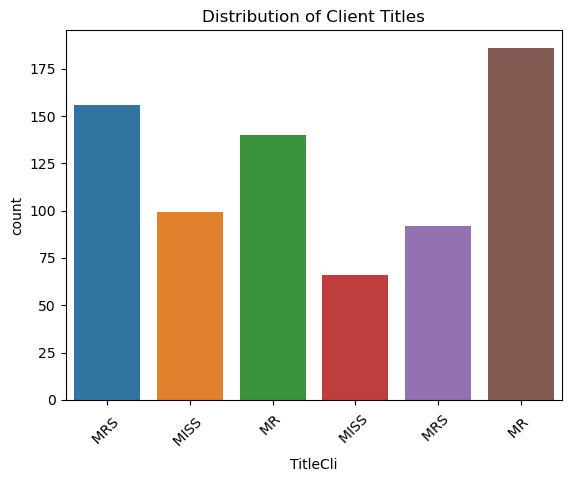

In [8]:
sns.countplot(data=df, x='TitleCli')
plt.title("Distribution of Client Titles")
plt.xticks(rotation=45)
plt.show()

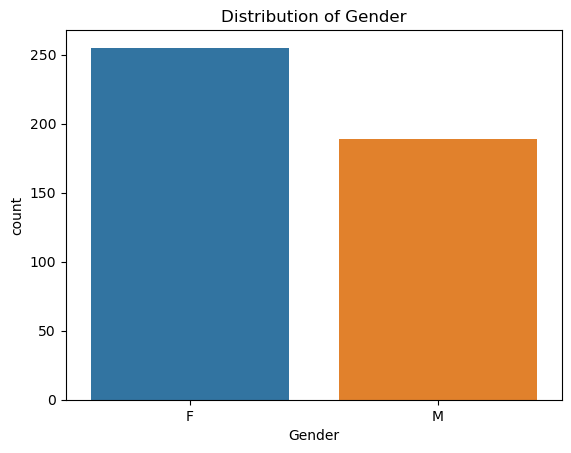

In [9]:
sns.countplot(data=df, x='Gender')
plt.title("Distribution of Gender")
plt.show()

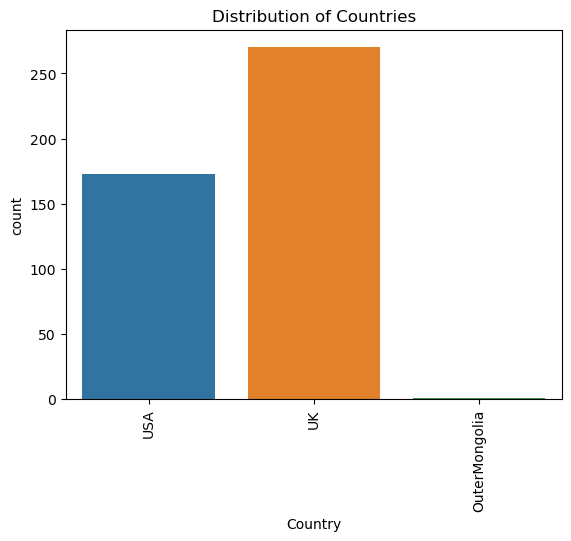

In [10]:
# Plot the distribution of Country
sns.countplot(data=df, x='Country')
plt.title("Distribution of Countries")
plt.xticks(rotation=90)  # This might be needed if you have many countries
plt.show()

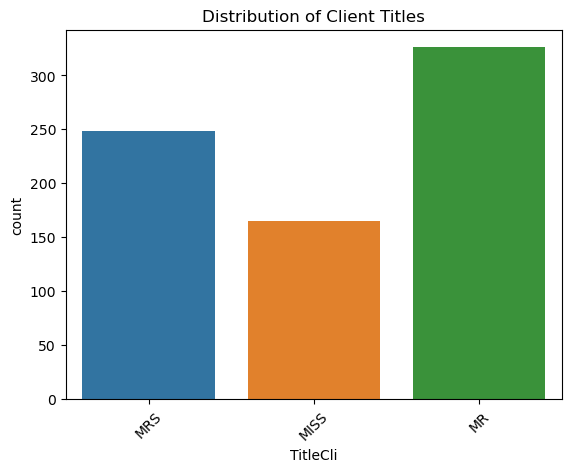

In [11]:
#fazer correções aos dados
#title cliente tem inconsistências devido à existências de whitespaces a mais. fazer trim

df['TitleCli'] = df['TitleCli'].str.strip()
#print(df)

#check to see if dataset inconsistencies were fixed:
sns.countplot(data=df, x='TitleCli')
plt.title("Distribution of Client Titles")
plt.xticks(rotation=45)
plt.show()

In [12]:
#ex3

In [13]:
#3.1
films_by_style = df.groupby('Style')['Film_Title'].count()

print(films_by_style)

Style
Adventure     47
Children     151
Comedy       214
Drama         94
Horror        50
Musical       28
Sci-Fi        92
Western       63
Name: Film_Title, dtype: int64


In [14]:
#3.2
films_by_style_unique = df.groupby('Style')['Film_Title'].nunique()

print(films_by_style_unique)

Style
Adventure     5
Children      3
Comedy       18
Drama         3
Horror        4
Musical       5
Sci-Fi       11
Western      12
Name: Film_Title, dtype: int64


In [15]:
#3.3
# Group by 'Style' and 'Film_Title' and count the number of units sold for each combination
units_sold = df.groupby(['Style', 'Film_Title']).size().reset_index(name='Units_Sold')

print(units_sold)

        Style                                         Film_Title  Units_Sold
0   Adventure                                         Hard Rider           9
1   Adventure                                     LighteningBall           7
2   Adventure                                     The Fourth Man          10
3   Adventure                                        The IP File          11
4   Adventure                                     The Nine Rules          10
..        ...                                                ...         ...
56    Western                                        The Finders           3
57    Western  The Nice the not so nice and the visually chal...           5
58    Western                                    The average six           4
59    Western                                         TheatreBus          17
60    Western                                          True Salt           3

[61 rows x 3 columns]


In [16]:
#3.4
number_costumers = df.groupby('Username').size()
purchase_numbers = number_costumers.value_counts().sort_index()
print(purchase_numbers)

1    547
2     74
3     12
4      2
dtype: int64


In [17]:
#3.5
summary_table = df.groupby('Style').agg(
    units_sold=('Product_ID', 'size'),
    min_price=('Price', 'min'),
    max_price=('Price', 'max'),
    avg_price=('Price', 'mean'),
    std_dev=('Price', 'std')
).reset_index()

print(summary_table)

       Style  units_sold  min_price  max_price  avg_price   std_dev
0  Adventure          47       7.99      12.99  11.607021  1.951067
1  Children          151       5.99       5.99   5.990000  0.000000
2     Comedy         214       5.99      15.99  10.027383  3.325602
3      Drama          94       7.99       7.99   7.990000  0.000000
4     Horror          50       5.99       8.99   7.310000  1.463013
5    Musical          28       5.99       5.99   5.990000  0.000000
6     Sci-Fi          92       5.99      15.99  10.685652  2.314499
7    Western          63       5.99      12.99   9.482063  2.422163


In [18]:
#ex4

In [19]:
#4.1
#print(df.columns)
#usar a coluna PurchDate e obter o dia da semana em que a compra ocorreu
#converter a data para dateTime em pandas

df['PurchDate'] = pd.to_datetime(df['PurchDate'])

df['DayOfWeek'] = df['PurchDate'].dt.day_name()
print(df)

         Username TitleCli         Name                         Address  \
0    user_1000884      MRS  DORIS126855  89594388-Boris Road-Doris Town   
1    user_1009862      MRS   DORIS42531  75844730-Boris Road-Doris Town   
2    user_1025298     MISS  DORIS136770  39704306-Boris Road-Doris Town   
3    user_1039001       MR  BORIS111529  46627181-Boris Road-Doris Town   
4    user_1040891      MRS  DORIS142154  82645107-Boris Road-Doris Town   
..            ...      ...          ...                             ...   
734   user_972607      MRS    DORIS6273  36217755-Boris Road-Doris Town   
735   user_975665       MR   BORIS95778  43605144-Boris Road-Doris Town   
736   user_979177      MRS   DORIS74765  94620905-Boris Road-Doris Town   
737    user_99281       MR   BORIS13620  57719599-Boris Road-Doris Town   
738   user_993341       MR  BORIS137380  29294945-Boris Road-Doris Town   

    Country Gender   Age Favourites           Order_ID  Product_ID      Style  \
0       USA      F

/tmp/ipykernel_4563/1278162792.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['PurchDate'] = pd.to_datetime(df['PurchDate'])


In [20]:
#4.2
#pegar na hora da compra e apresentar uma nova coluna com a altura do dia (manha, tarde, noite, etc)
def period_of_day(time_str):
    hour = (int)(time_str.split(':')[0])
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour <17:
        return 'Afternoon'
    elif 17 <= hour <21:
        return 'Evening'
    else:
        return 'Night'
    
df['DayPeriod'] = df['PurchTime'].apply(period_of_day)

print(df)

         Username TitleCli         Name                         Address  \
0    user_1000884      MRS  DORIS126855  89594388-Boris Road-Doris Town   
1    user_1009862      MRS   DORIS42531  75844730-Boris Road-Doris Town   
2    user_1025298     MISS  DORIS136770  39704306-Boris Road-Doris Town   
3    user_1039001       MR  BORIS111529  46627181-Boris Road-Doris Town   
4    user_1040891      MRS  DORIS142154  82645107-Boris Road-Doris Town   
..            ...      ...          ...                             ...   
734   user_972607      MRS    DORIS6273  36217755-Boris Road-Doris Town   
735   user_975665       MR   BORIS95778  43605144-Boris Road-Doris Town   
736   user_979177      MRS   DORIS74765  94620905-Boris Road-Doris Town   
737    user_99281       MR   BORIS13620  57719599-Boris Road-Doris Town   
738   user_993341       MR  BORIS137380  29294945-Boris Road-Doris Town   

    Country Gender   Age Favourites           Order_ID  Product_ID      Style  \
0       USA      F

In [21]:
#4.3
def price_range(price):
    valueRange = Max_price-Min_price
    third = valueRange/3
    if Min_price <= price < Min_price+third:
        return 'Low'
    elif Min_price+third <= price < Min_price+2*third:
        return 'Medium'
    else:
        return 'High'

    

Min_price = df['Price'].min()
Max_price = df['Price'].max()

df['PriceRange'] = df['Price'].apply(price_range)

print(df)



         Username TitleCli         Name                         Address  \
0    user_1000884      MRS  DORIS126855  89594388-Boris Road-Doris Town   
1    user_1009862      MRS   DORIS42531  75844730-Boris Road-Doris Town   
2    user_1025298     MISS  DORIS136770  39704306-Boris Road-Doris Town   
3    user_1039001       MR  BORIS111529  46627181-Boris Road-Doris Town   
4    user_1040891      MRS  DORIS142154  82645107-Boris Road-Doris Town   
..            ...      ...          ...                             ...   
734   user_972607      MRS    DORIS6273  36217755-Boris Road-Doris Town   
735   user_975665       MR   BORIS95778  43605144-Boris Road-Doris Town   
736   user_979177      MRS   DORIS74765  94620905-Boris Road-Doris Town   
737    user_99281       MR   BORIS13620  57719599-Boris Road-Doris Town   
738   user_993341       MR  BORIS137380  29294945-Boris Road-Doris Town   

    Country Gender   Age Favourites           Order_ID  Product_ID      Style  \
0       USA      F

In [22]:
#4.4
def classify_age(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 70:
        return 'Middle-aged'
    else:
        return 'Elderly'
    
df['AgeRange'] = df['Age'].apply(classify_age)
print(df)

         Username TitleCli         Name                         Address  \
0    user_1000884      MRS  DORIS126855  89594388-Boris Road-Doris Town   
1    user_1009862      MRS   DORIS42531  75844730-Boris Road-Doris Town   
2    user_1025298     MISS  DORIS136770  39704306-Boris Road-Doris Town   
3    user_1039001       MR  BORIS111529  46627181-Boris Road-Doris Town   
4    user_1040891      MRS  DORIS142154  82645107-Boris Road-Doris Town   
..            ...      ...          ...                             ...   
734   user_972607      MRS    DORIS6273  36217755-Boris Road-Doris Town   
735   user_975665       MR   BORIS95778  43605144-Boris Road-Doris Town   
736   user_979177      MRS   DORIS74765  94620905-Boris Road-Doris Town   
737    user_99281       MR   BORIS13620  57719599-Boris Road-Doris Town   
738   user_993341       MR  BORIS137380  29294945-Boris Road-Doris Town   

    Country Gender   Age Favourites           Order_ID  Product_ID      Style  \
0       USA      F

In [23]:
#ex5


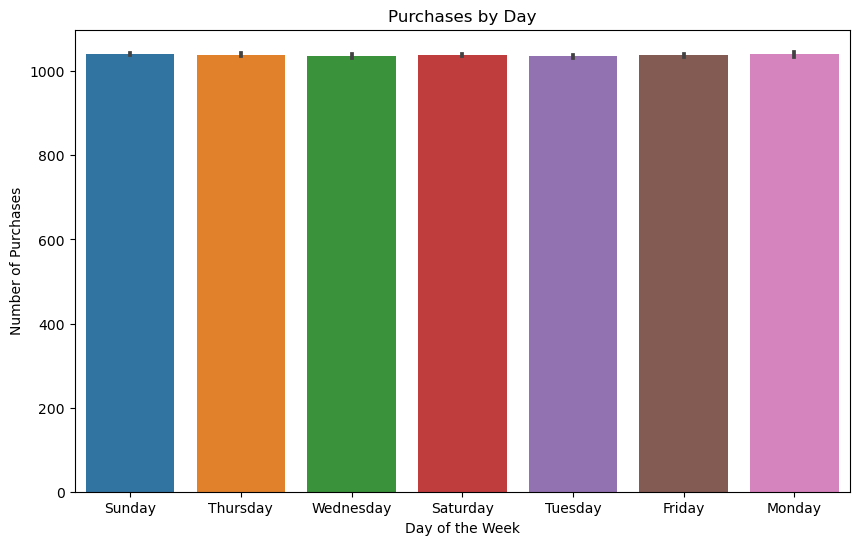

In [24]:
#5.1
plt.figure(figsize=(10, 6))
sns.barplot(data = df, x='DayOfWeek', y='Product_ID')
plt.title('Purchases by Day')
plt.ylabel('Number of Purchases')
plt.xlabel('Day of the Week')
plt.show()

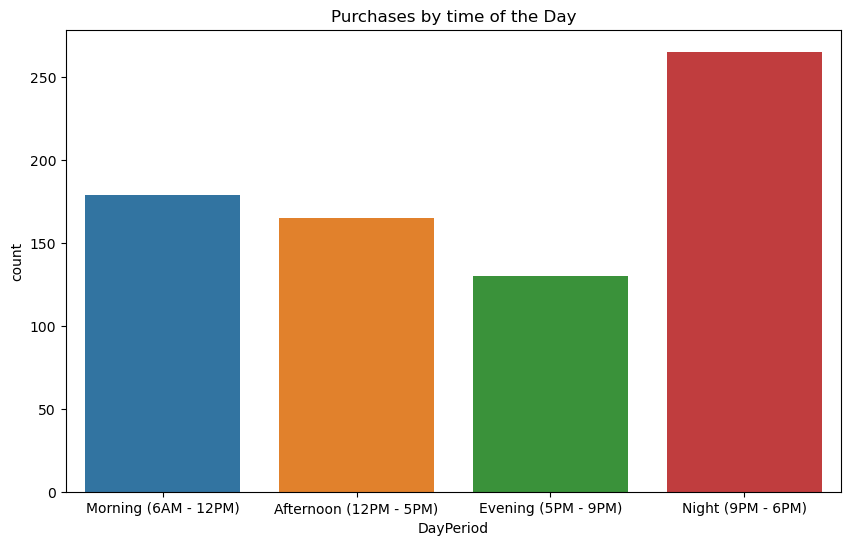

In [53]:
#5.2
#print(df.groupby('DayPeriod')['Product_ID'].value_counts())
time_map = {
    'Morning': '6AM - 12PM', 
    'Afternoon': '12PM - 5PM', 
    'Evening': '5PM - 9PM', 
    'Night': '9PM - 6PM'
}
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayPeriod', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Purchases by time of the Day')
plt.xticks(ticks=range(4), labels =[f"{period} ({time_map[period]})" for period in ['Morning', 'Afternoon', 'Evening', 'Night']])
plt.show()


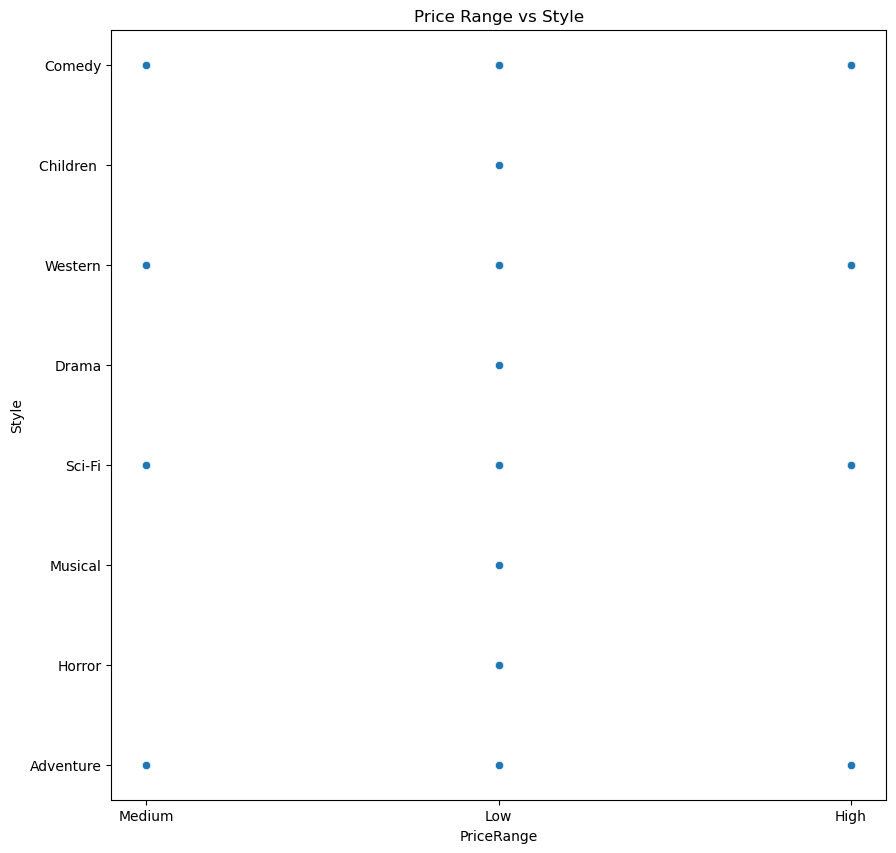

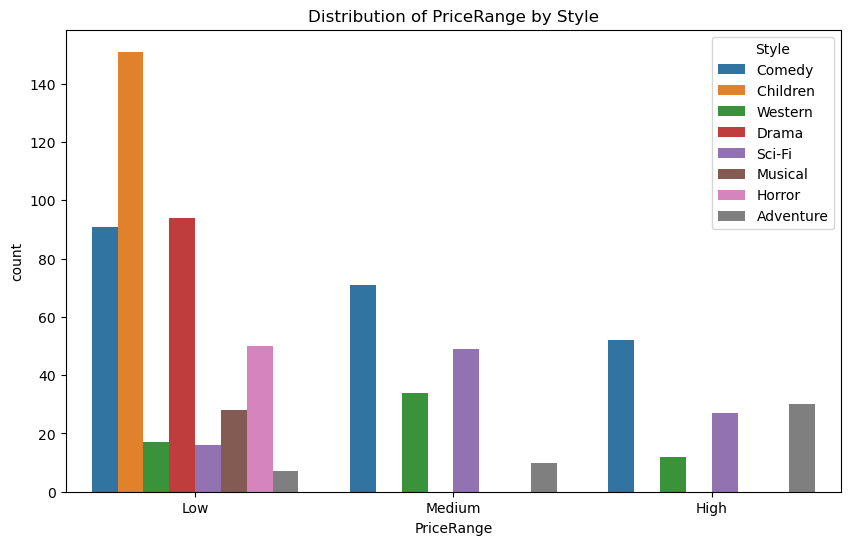

In [48]:
#5.3
plt.figure(figsize=(10, 10))
sns.scatterplot(data = df, x='PriceRange', y='Style')
plt.title('Price Range vs Style')
plt.ylabel('Style')
plt.xlabel('PriceRange')
plt.show()


#usar um countplot, assim temos uma noção de quantidades
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PriceRange', hue='Style', order=['Low', 'Medium', 'High'])
plt.title('Distribution of PriceRange by Style')
plt.show()


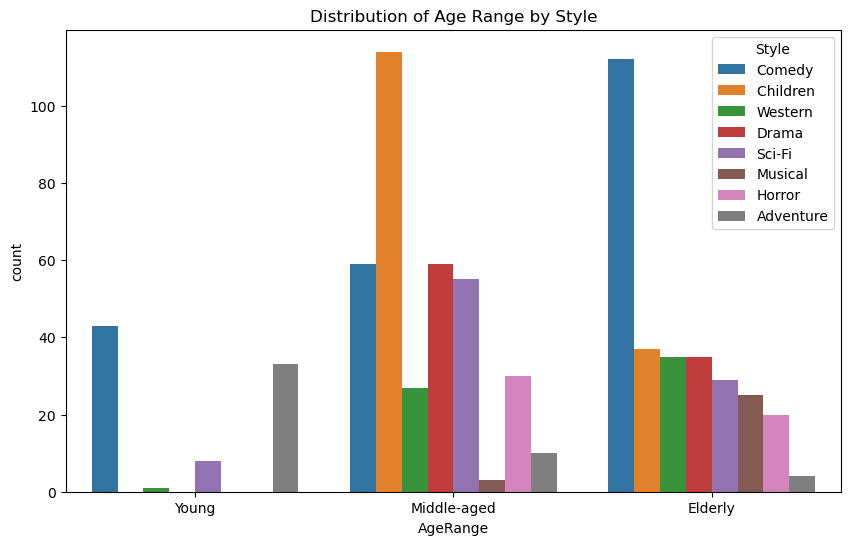

In [32]:
#5.4
# plt.figure(figsize=(10, 10))
# sns.scatterplot(data = df, x='AgeRange', y='Style')
# plt.title('Age Range vs Style')
# plt.ylabel('Style')
# plt.xlabel('AgeRange')
# plt.show()

#print(df.groupby('Style')['AgeRange'].value_counts())

#um coutplot é melhor para visualizar os dados
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeRange', hue='Style')
plt.title('Distribution of Age Range by Style')
plt.show()

# g = sns.FacetGrid(df, col='Style', col_wrap=3, height=4, sharex=True, sharey = False)
# g.map(sns.barplot, 'AgeRange', 'Style')

# g.set_titles("Style vs Age Range")
# g.set_axis_labels('AgeRange', 'Style')
# plt.show()

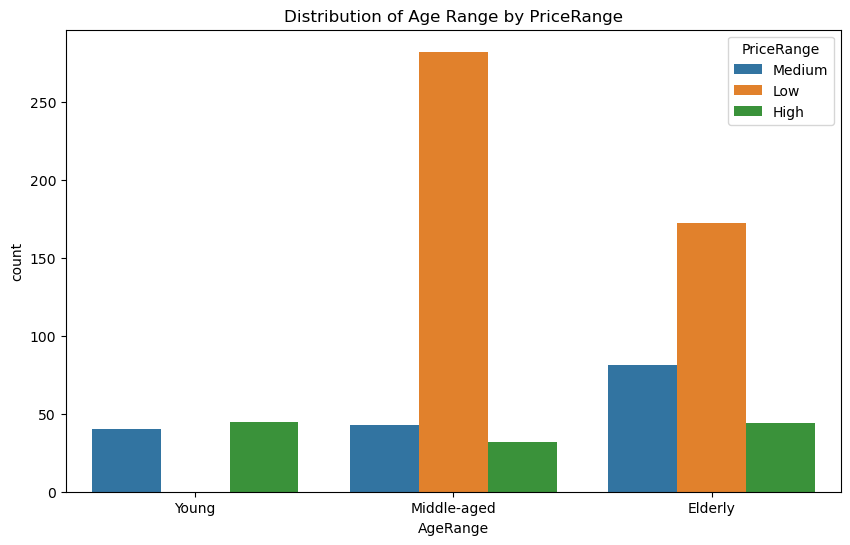

In [41]:
#5.5
#print(df.groupby('PriceRange')['AgeRange'].value_counts())

#um coutplot é melhor para visualizar os dados
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeRange', hue='PriceRange')
plt.title('Distribution of Age Range by PriceRange')
plt.show()


#decidi ver as idades
# plt.figure(figsize=(20, 6))
# sns.countplot(data=df, x='Age', order=sorted(df['Age'].value_counts().index))
# plt.show()

         Username TitleCli         Name                         Address  \
16   user_1148012     MISS   DORIS12734  86032116-Boris Road-Doris Town   
24    user_118404       MR     BORIS322  15388961-Boris Road-Doris Town   
26   user_1195606       MR   BORIS43243  48726344-Boris Road-Doris Town   
59   user_1375492       MR   BORIS47725  86730228-Boris Road-Doris Town   
60   user_1388747     MISS   DORIS95388  81790469-Boris Road-Doris Town   
..            ...      ...          ...                             ...   
703   user_693108       MR   BORIS86889  22218596-Boris Road-Doris Town   
710   user_786162       MR    BORIS7140  65561927-Boris Road-Doris Town   
711   user_789021       MR  BORIS147754  71397421-Boris Road-Doris Town   
719   user_889110       MR   BORIS57358  32621241-Boris Road-Doris Town   
725   user_953278     MISS   DORIS17812  48459241-Boris Road-Doris Town   

    Country Gender   Age Favourites           Order_ID  Product_ID  ...  \
16       UK      F  55.0

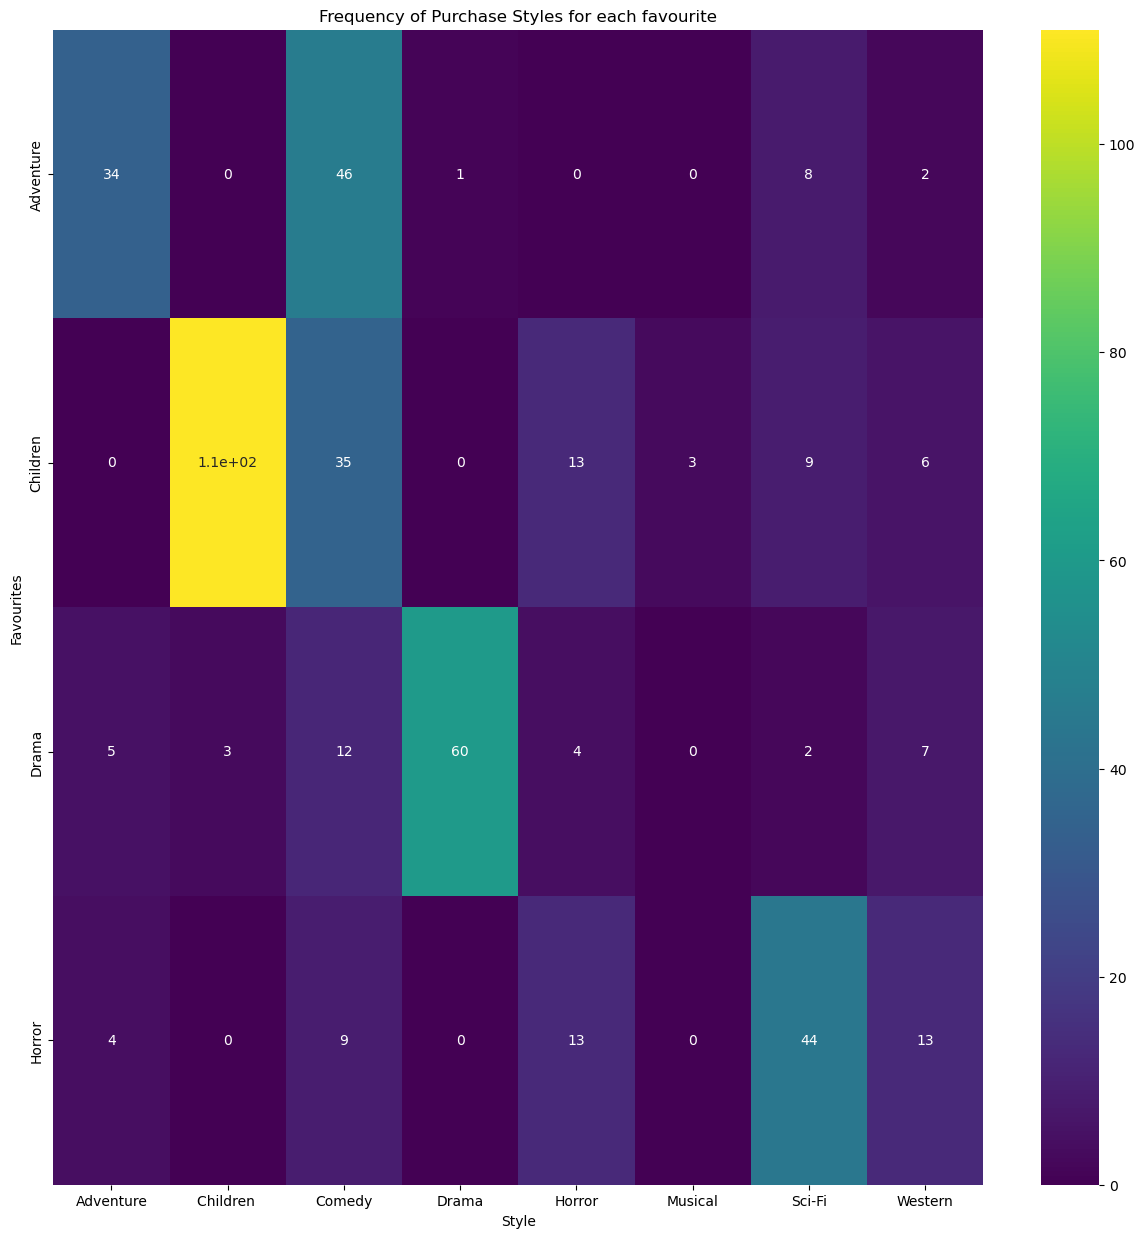

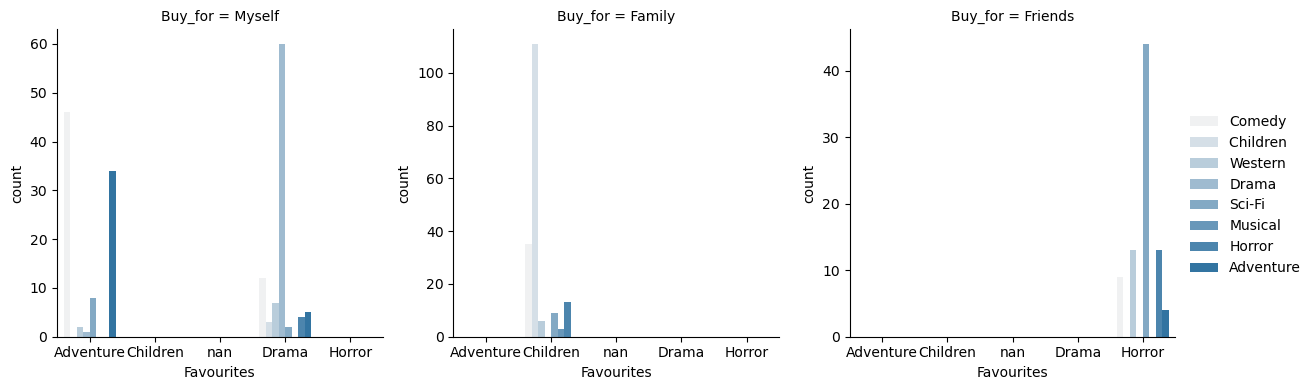

In [65]:
#ex6
# print(df.columns)

matched_preferences = df['Favourites'] == df['Style']

matched_df = df[matched_preferences]

print(matched_df)
#temos uma dataframe, neste um subconjunto que possui todos os utilizadores que
#cujas compras são exemplos em que o facorito corresponde ao género da compra

#agora fazer uma análise dos 3 "vs"

analysis_df = df.groupby(['Favourites', 'Style', 'Buy_for']).size().reset_index(name='Count')
print(analysis_df)

#tendo os dados, só falta visualizá-los
heatmap_data = df.groupby(['Favourites', 'Style']).size().unstack().fillna(0)
plt.figure(figsize=(15, 15))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title("Frequency of Purchase Styles for each favourite")
plt.show()



#visualização dos 3 dados
g = sns.FacetGrid(df, col="Buy_for", col_wrap=3, height=4, sharey=False)  # Setting sharey=False ensures each facet has its own y-axis scale
g.map(sns.countplot, 'Favourites', hue=df['Style'], order=df['Favourites'].unique())  # Ordering is done to ensure consistent x-axis categories across facets
g.add_legend()